   danceability    energy       tempo   valence  acousticness  \
0      0.674507  0.885236   80.097910  0.408670      0.284450   
1      0.579260  1.000000   72.548141  0.546170      0.130274   
2      0.697153  0.420286  136.371630  0.163218      0.407443   
3      0.828454  0.812594  144.777087  0.257096      0.211766   
4      0.564877  0.569871   63.790337  0.800103      0.099683   

   instrumentalness  liveness  speechiness   loudness  duration_ms  popularity  
0          0.040892  0.271141     0.093573 -40.789130       223235          11  
1          0.140585  0.511291     0.067416 -19.784761       165510          19  
2          0.253578  0.280804     0.000000 -48.725785       207945          44  
3          0.030382  0.115193     0.179974 -22.512276       190649          63  
4          0.006021  0.157624     0.135157 -39.812979       226723          58  


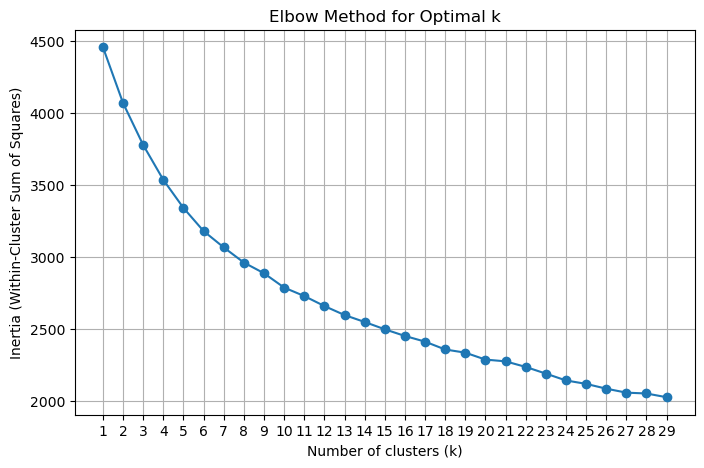

Cluster Summary:
     cluster  popularity_mean  popularity_count  danceability_mean  \
0         0            22.41                32               0.55   
1         1            25.38                39               0.68   
2         2            75.72                32               0.59   
3         3            44.69                26               0.48   
4         4            72.08                25               0.73   
5         5            63.51                35               0.60   
6         6            36.23                26               0.50   
7         7            69.10                21               0.45   
8         8            31.00                22               0.46   
9         9            52.90                30               0.60   
10       10            68.52                31               0.75   
11       11            24.30                37               0.61   
12       12            39.54                24               0.78   
13       13     

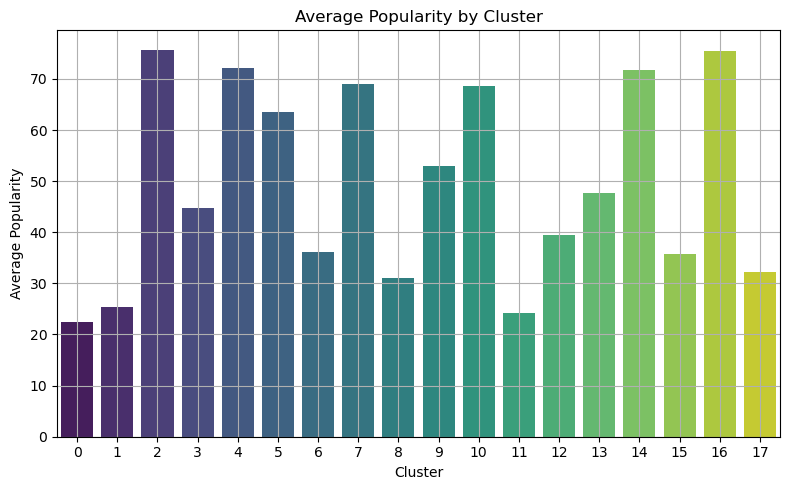

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


df = pd.read_csv('downloads/sample_spotify_audio_features.csv')  

print(df.head())


numerical_features = [
    'danceability', 'energy', 'acousticness',
    'instrumentalness', 'liveness', 'valence',
    'tempo', 'speechiness', 'popularity'
]


df_clean = df.dropna(subset=numerical_features)
df_clean = df_clean.drop_duplicates()
df_clean = df_clean[df_clean['popularity'] > 0]


features_for_clustering = df_clean[numerical_features] 
X = features_for_clustering


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


inertia = []
k_range = range(1, 30)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(k_range)
plt.grid(True)
plt.show()


k = 18
kmeans = KMeans(n_clusters=k, random_state=42)
df_clean['cluster'] = kmeans.fit_predict(X_scaled)


cluster_summary = df_clean.groupby('cluster').agg({
    'popularity': ['mean', 'count'],
    'danceability': 'mean',
    'energy': 'mean',
    'acousticness': 'mean',
    'instrumentalness': 'mean'
}).round(2)

cluster_summary.columns = ['_'.join(col) for col in cluster_summary.columns]
cluster_summary = cluster_summary.reset_index()

print("Cluster Summary:\n", cluster_summary)


plt.figure(figsize=(8, 5))
sns.barplot(data=cluster_summary, x='cluster', y='popularity_mean', palette='viridis')
plt.title('Average Popularity by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.tight_layout()
plt.show()

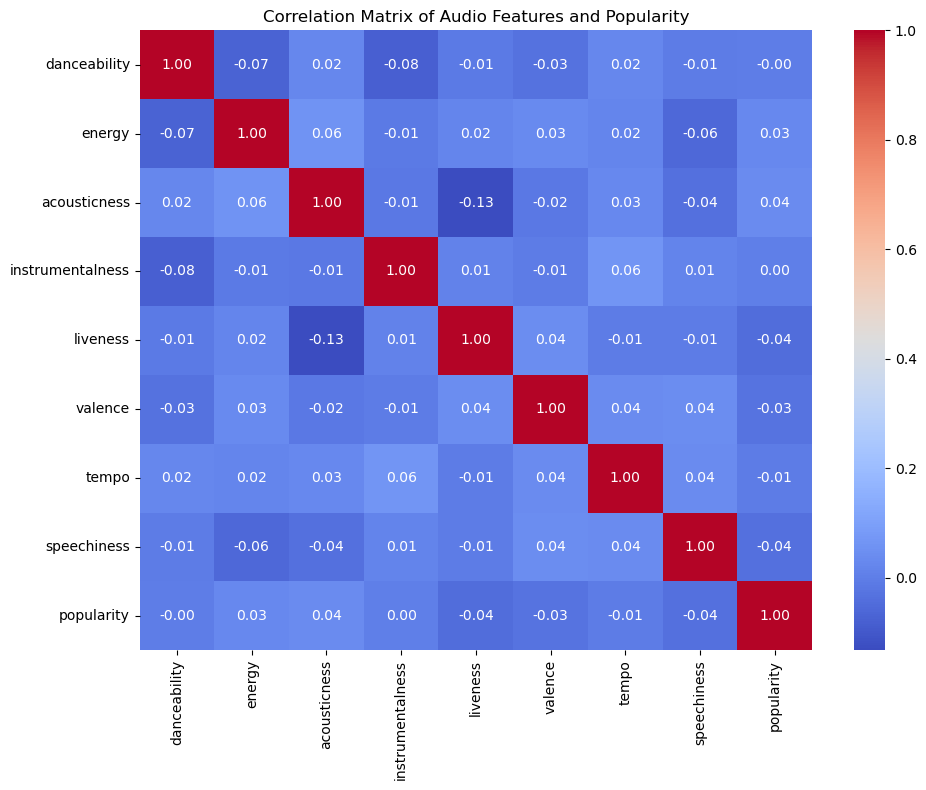

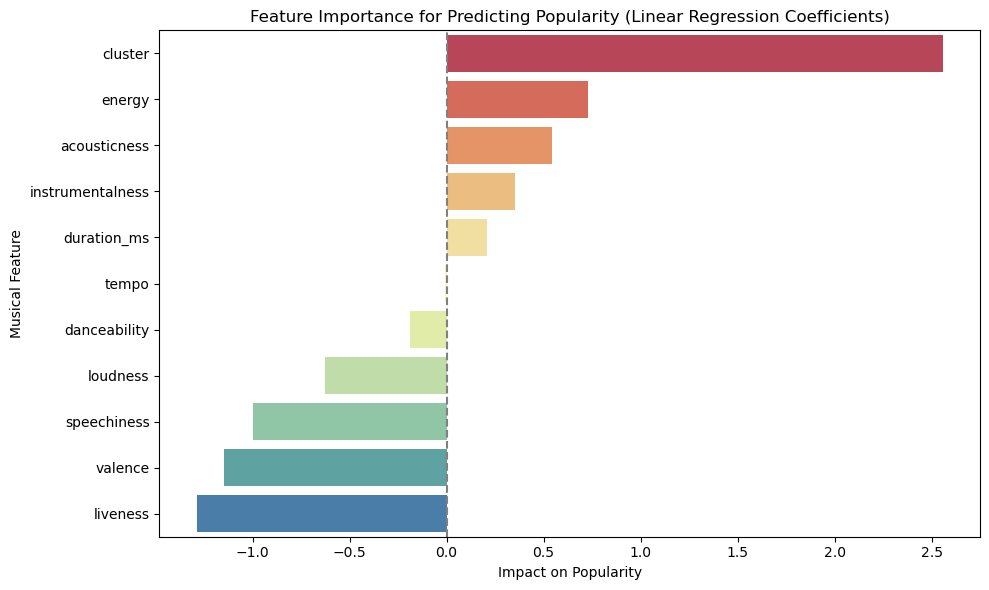

In [14]:
from sklearn.linear_model import LinearRegression
import numpy as np

plt.figure(figsize=(10, 8))
corr_matrix = df_clean[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Audio Features and Popularity')
plt.tight_layout()
plt.show()


X = df_clean.drop(columns=['popularity'])
y = df_clean['popularity']

X_scaled = scaler.fit_transform(X)


model = LinearRegression()
model.fit(X_scaled, y)


feature_names = X.columns
coefficients = model.coef_


importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Coefficient', y='Feature', palette='Spectral')
plt.title('Feature Importance for Predicting Popularity (Linear Regression Coefficients)')
plt.xlabel('Impact on Popularity')
plt.ylabel('Musical Feature')
plt.axvline(x=0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

In [13]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("downloads/sample_spotify_audio_features.csv")


df.dropna(inplace=True)


X = df.drop(['popularity'], axis=1)
y = df['popularity']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 985.34
R-squared Score: -0.17
